# 95-865: Dimensionality Reduction with Images

Author: George H. Chen (georgechen [at symbol] cmu.edu)

We start with some usual boilerplate code:

In [5]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

# these next two lines are needed on my old Intel Mac laptop due to some weird software update issue and also a memory issue
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '1'

## Loading in a handwritten digit dataset

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.MNIST(root='data/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
images = np.array([image.numpy() for image, label in train_dataset])

100%|██████████| 9912422/9912422 [00:00<00:00, 17320744.81it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23691706.20it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 6019487.39it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5281543.88it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [7]:
images.shape

(60000, 1, 28, 28)

In [8]:
num_images = images.shape[0]
print(num_images)

60000


In [9]:
feature_vectors = images.reshape(num_images, -1)  # flattens out each training image

In [10]:
feature_vectors.shape

(60000, 784)

In [11]:
# we will work with a subsample of the data
np.random.seed(0)
random_sample = np.random.permutation(num_images)[:10000]  # 10000 random indices

In [12]:
random_sample

array([ 3048, 19563, 58303, ..., 15241, 26970, 26146])

In [13]:
[np.random.randint(num_images) for idx in range(10000)]  # with replacement

[30540,
 11293,
 57161,
 51464,
 47345,
 505,
 26833,
 50010,
 58154,
 15148,
 10090,
 30022,
 29317,
 22813,
 51546,
 14191,
 58375,
 39736,
 22270,
 44675,
 23065,
 30629,
 56114,
 21200,
 24265,
 32273,
 52592,
 5816,
 35526,
 14038,
 4559,
 52042,
 49323,
 41675,
 11595,
 20217,
 830,
 59596,
 43545,
 334,
 46728,
 56736,
 56223,
 7757,
 19245,
 56073,
 15256,
 42262,
 41654,
 31193,
 13751,
 4269,
 38103,
 10850,
 53315,
 2135,
 25578,
 38193,
 5558,
 2454,
 30425,
 29446,
 27083,
 45623,
 23475,
 52845,
 44035,
 11703,
 49870,
 37010,
 14604,
 56270,
 7978,
 59208,
 58787,
 59774,
 12732,
 32837,
 37841,
 9392,
 28455,
 52243,
 23776,
 42080,
 36338,
 24396,
 42847,
 36301,
 59346,
 16970,
 26904,
 41938,
 33659,
 6886,
 54863,
 37945,
 36207,
 17110,
 46652,
 33509,
 45730,
 8892,
 26701,
 15562,
 20742,
 21070,
 14086,
 14602,
 7342,
 49227,
 55793,
 52078,
 16724,
 23452,
 37596,
 51002,
 30762,
 42322,
 14845,
 140,
 18890,
 36703,
 41234,
 27148,
 38524,
 51445,
 39382,
 106

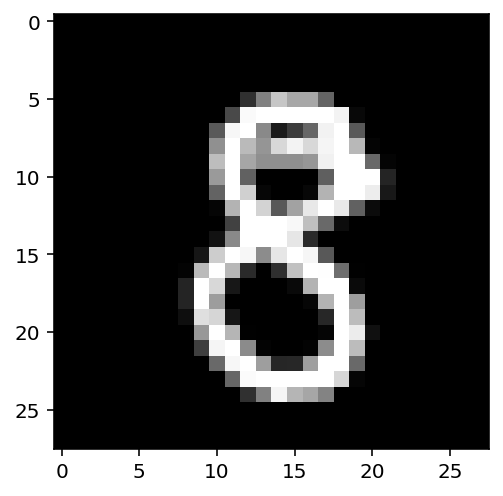

In [14]:
# you can re-run this to see random digits
plt.imshow(feature_vectors[np.random.randint(num_images)].reshape(28, 28),
           cmap='gray')

## Dimensionality reduction with PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # project data down to 2 dimensions
feature_vectors_pca2d = pca.fit_transform(feature_vectors[random_sample])

In [12]:
pca.explained_variance_ratio_

array([0.09845046, 0.07117973], dtype=float32)

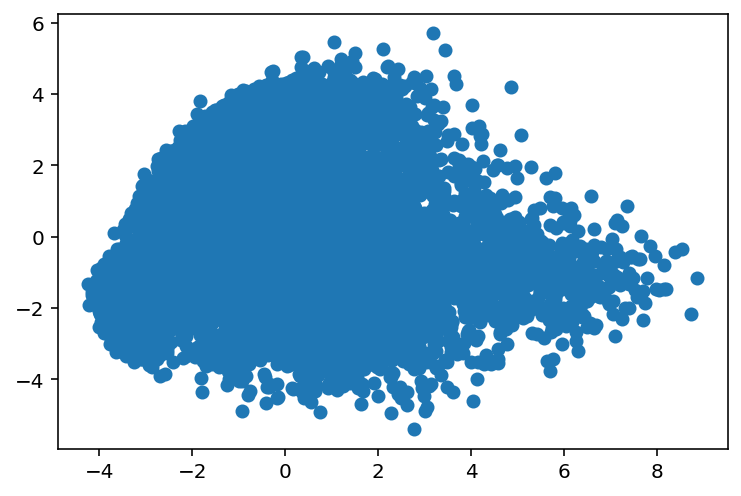

In [16]:
plt.scatter(feature_vectors_pca2d[:, 0], feature_vectors_pca2d[:, 1])

## Dimensionality reduction with t-SNE

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000, random_state=0)
feature_vectors_tsne2d = tsne.fit_transform(feature_vectors[random_sample])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 2.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.123686
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.613159
[t-SNE] KL divergence after 5000 iterations: 1.689759


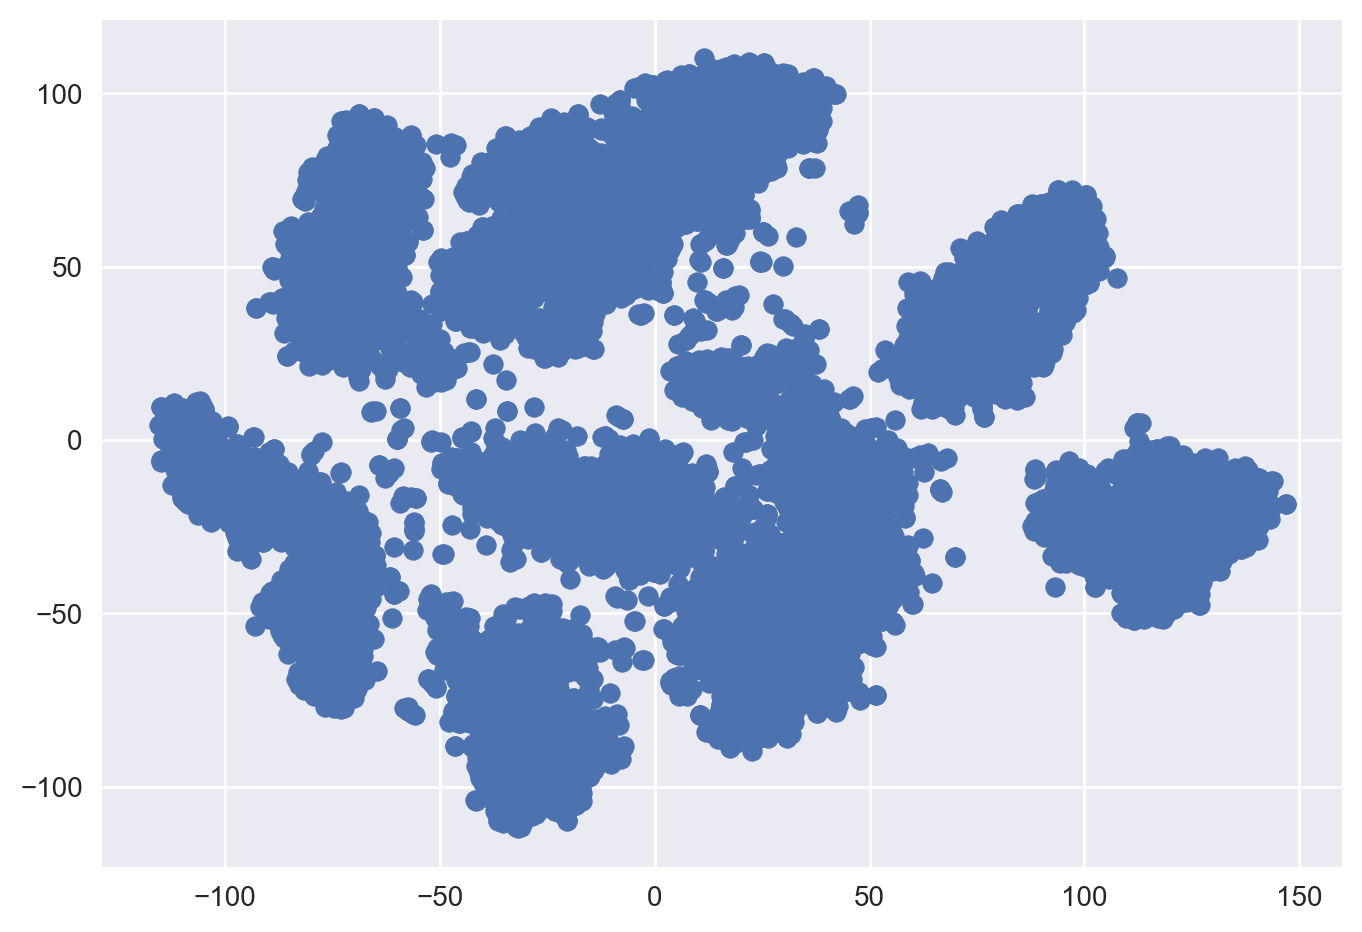

In [15]:
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1])

In [16]:
labels = np.array([label for image, label in train_dataset])

In [17]:
labels

array([5, 0, 4, ..., 5, 6, 8])

In [18]:
labels[random_sample]

array([3, 6, 6, ..., 1, 9, 2])

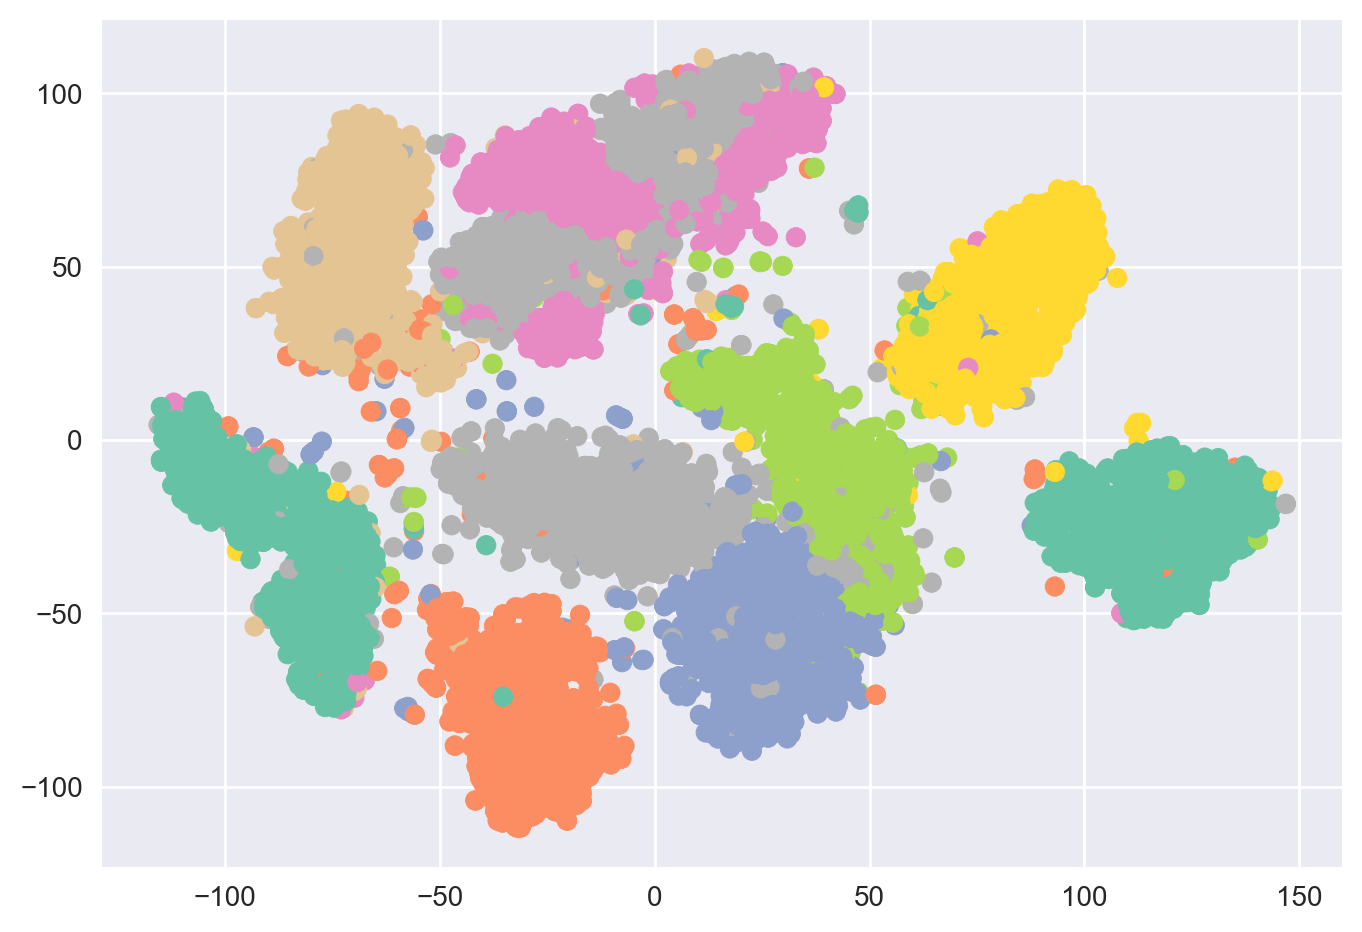

In [19]:
# here we color each low-dimensional t-SNE point differently depending on its true known label for what digit the point corresponds to
# (in many applications we do not have this sort of label information!)
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1],
            c=labels[random_sample], cmap='Set2')

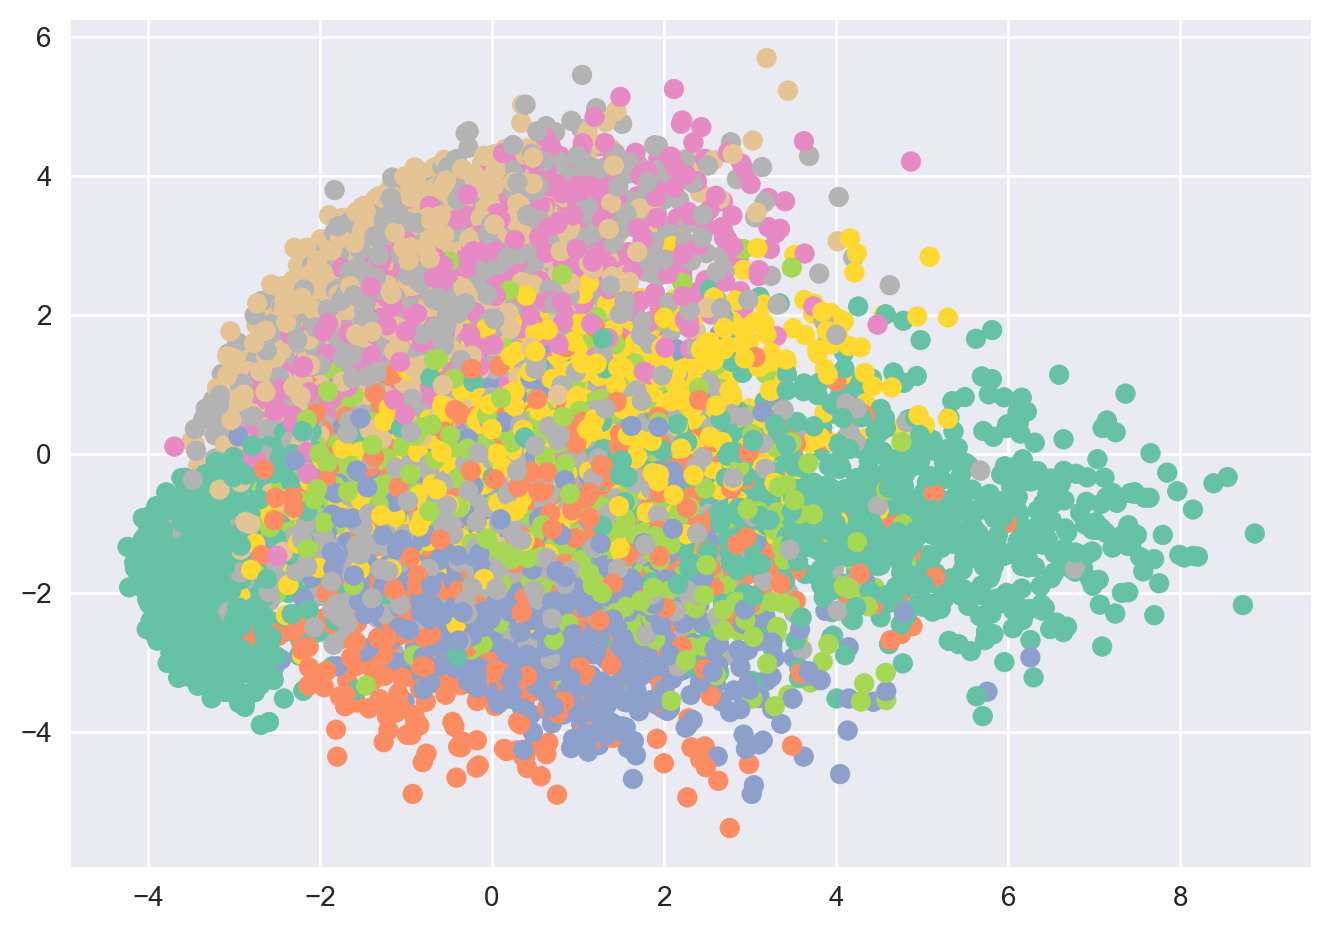

In [20]:
# coloring the points by true digit label, now for PCA
plt.scatter(feature_vectors_pca2d[:, 0], feature_vectors_pca2d[:, 1],
            c=labels[random_sample], cmap='Set2')